In [2]:
#cd C:\Users\Grażusia\Downloads\CSV

C:\Users\Grażusia\Downloads\CSV


In [195]:
import pandas as pd
from pytz import common_timezones, all_timezones
from matplotlib.pyplot import *

In [270]:
fbData = pd.read_csv('FB-Copy1.csv', sep = ",")
fbData = fbData.set_index(['Posted'])
fbData.index=pd.to_datetime(fbData.index).tz_localize('America/Los_Angeles').tz_convert('Europe/Berlin')
#fbData['Hour']=fbData['Posted'].hour

fbData['Hour']=fbData.index.hour
fbData['Day']=fbData.index.day
fbData['Month']=fbData.index.month
fbData['Year']=fbData.index.year
fbData['Wday']=fbData.index.weekday

Text(0,0.5,'posts per weekday')

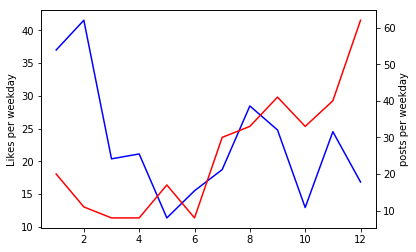

In [260]:
#Average likes count vs posts count (per month)
hours=fbData.groupby('Month')['like'].mean()
#hours=fbData.groupby('Month')['like'].sum()
hours_count=fbData.groupby('Month')['like'].count()

fig, ax1 = subplots()
ax1.plot(hours, color='b')
ax1.set_ylabel(r"Likes per month")
ax2 = ax1.twinx()
ax2.plot(hours_count, color='r') 
ax2.set_ylabel(r"posts per month")

Text(0,0.5,'posts per weekday')

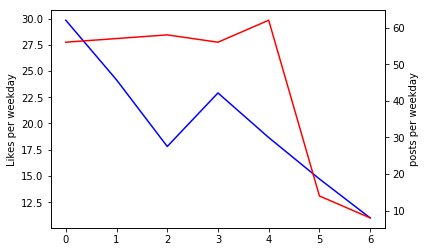

In [261]:
#Average likes count vs posts count (per weed kay)
hours=fbData.groupby('Wday')['like'].mean()
#hours=fbData.groupby('Wday')['like'].sum()
hours_count=fbData.groupby('Wday')['like'].count()

fig, ax1 = subplots()
ax1.plot(hours, color='b')
ax1.set_ylabel(r"Likes per weekday")
ax2 = ax1.twinx()
ax2.plot(hours_count, color='r') 
ax2.set_ylabel(r"posts per weekday")

In [127]:
from collections import Counter
words_count=fbData['Posted message'].str.lower().str.split().sum(axis = 0)
#words_count=fbData.Posted message.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
words_count

15466

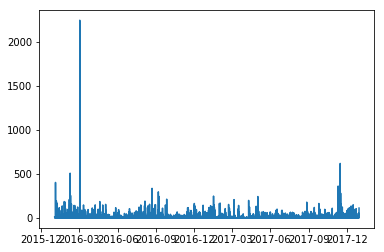

In [234]:
site_likes=pd.read_csv('FB_likes.csv', sep = ",")
site_likes = site_likes.set_index(['Datum'])
site_likes.index=pd.to_datetime(site_likes.index).tz_localize('America/Los_Angeles').tz_convert('Europe/Berlin')
count_activity=site_likes.groupby(pd.Grouper(freq='H'))["Daily Users' Interactions"].sum()
count_likes=test.groupby(pd.Grouper(freq='H'))['like'].count()
merged_new=pd.concat([count_activity,count_likes],axis=1)
merged_new.columns=['Activity count','Posts count']
plot(count_activity)